In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import seaborn as sns
data_set = "winequality-red.csv"

In [2]:
#reading the data
data_frame = pd.read_csv(data_set)
data_frame.shape

(1599, 12)

In [3]:
#checking the first five entries to understand the data
data_frame.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking all information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From above result through info, we can see totalentries are 1599 and for all of the features and label. It is shown that 1599 non-null, indicating we do not have any missing values. Another thing which i observed is data type for each column. By looking at the values of each column and than comapring with the type of data assigned which is float64 for all features, it is depicted that all features has appropriate data type. For the label class quality, as i see there are all integer values in it. So it also has apropriate data type which is integer.

In [5]:
print(data_frame['quality'])

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


Now i want to see the unique values in the quality column.

Descriptive Statistics: Descriptive Statistics
Descriptive statistics can give you great insight into the shape of each attribute.

Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute:

a). Count

b). Mean

c). Standard Deviation

d). Minimum Value

e). 25th Percentile

f). 50th Percentile (Median)

g). 75th Percentile

h). Maximum Value

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

There is notably a large difference between 75th %tile and max values of predictors “residual sugar”,”free sulfur dioxide”,”total sulfur dioxide”. Thus observation suggests that there are extreme values-Outliers in our data set.

In [9]:
data_frame.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


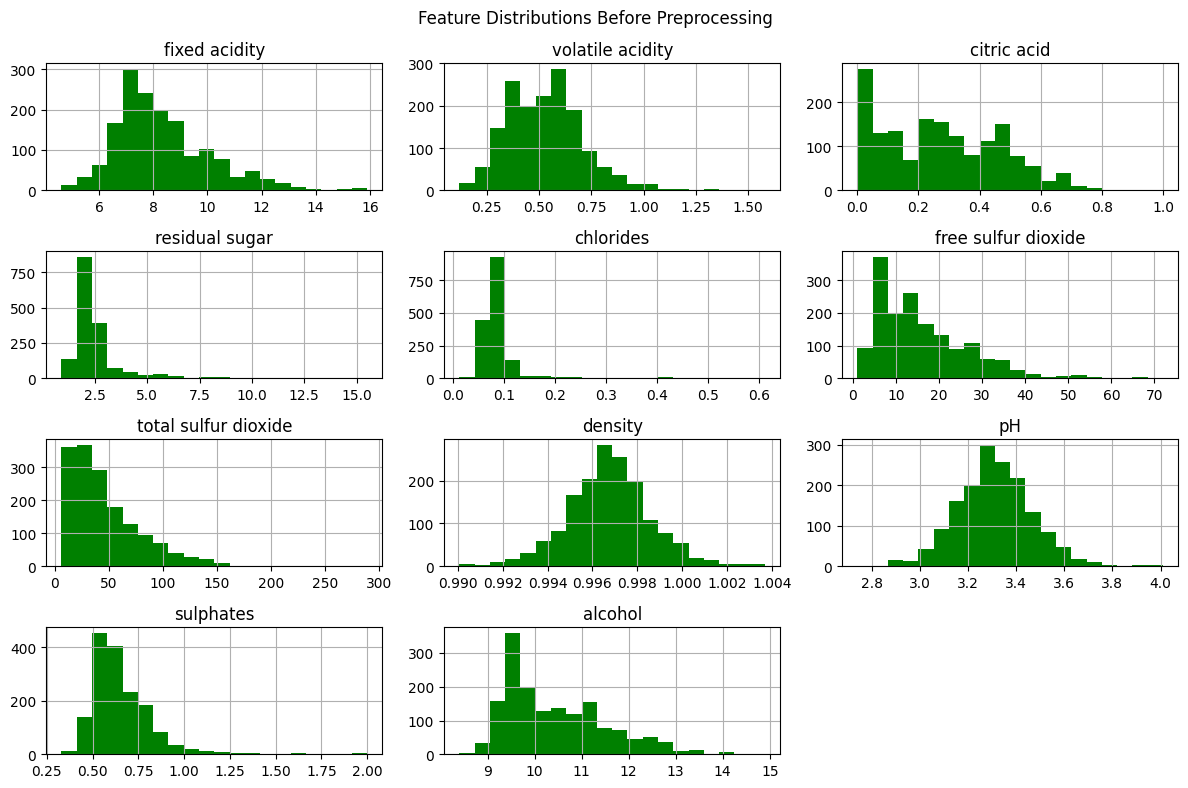

In [12]:
features = data_frame.drop('quality', axis=1).columns.tolist()
data_frame[features].hist(figsize=(12, 8), bins=20, color = "green")
plt.suptitle('Feature Distributions Before Preprocessing')
plt.tight_layout()
plt.show()

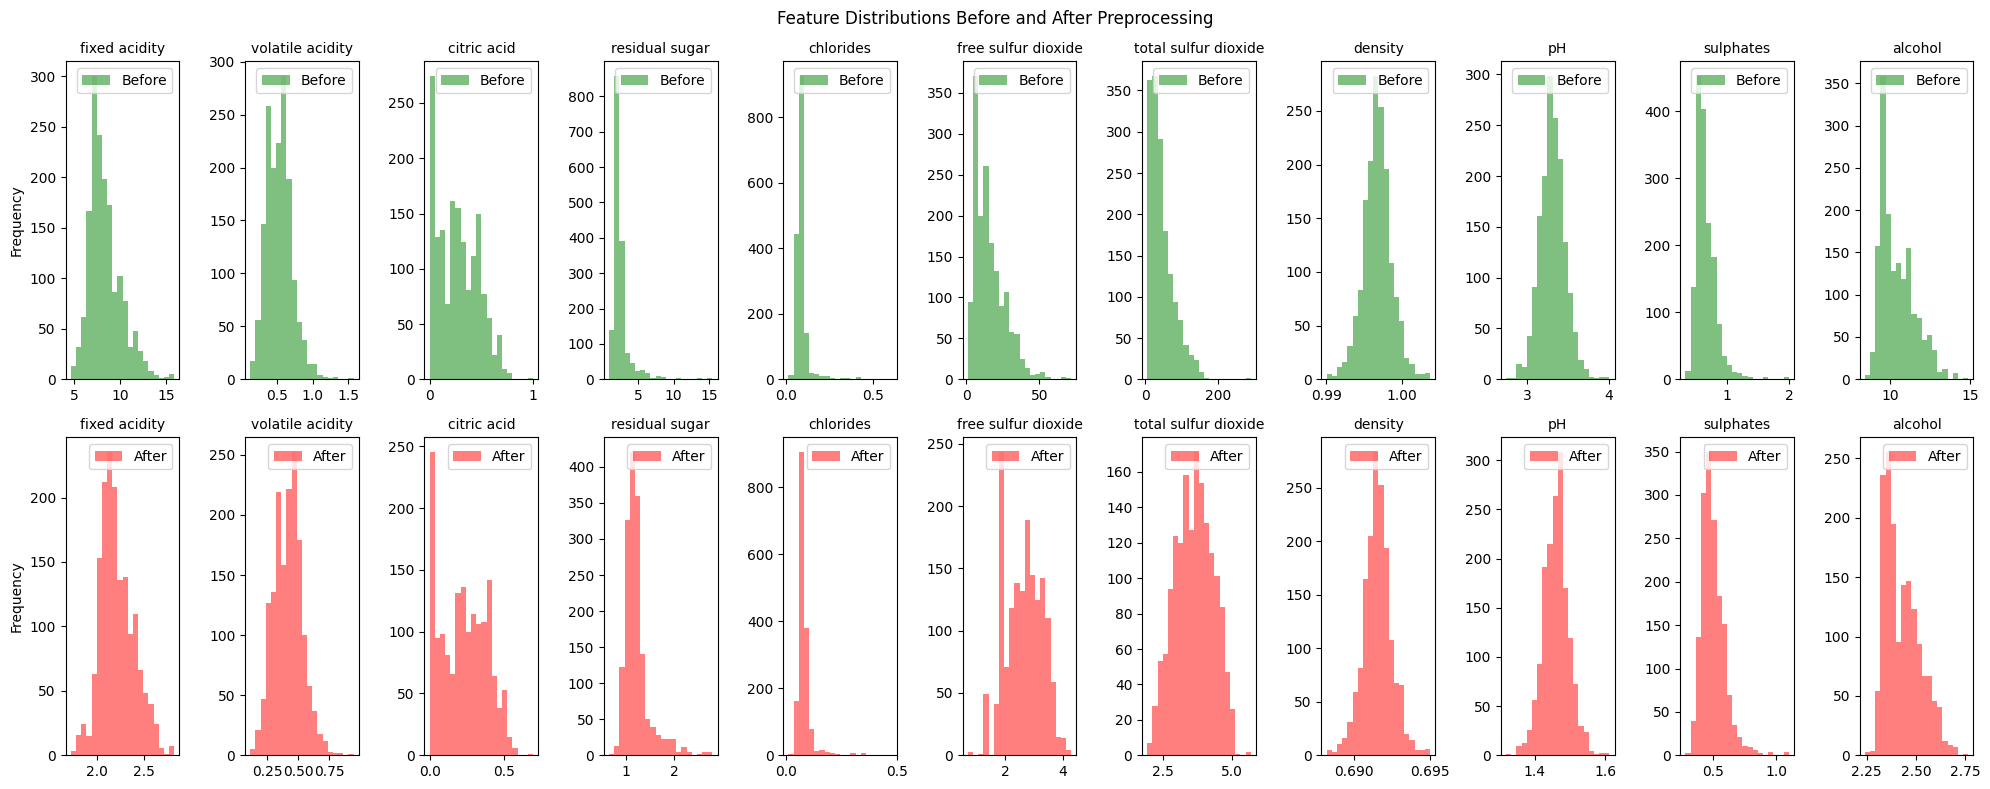

In [13]:
# Defining features and target
#features = data_frame.drop('quality', axis=1).columns.tolist()
X_red, y_red = data_frame[features], data_frame['quality']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('log_transform', FunctionTransformer(np.log1p), features),
        ('std_scaler', StandardScaler(), features)
    ]
)

# Applying preprocessing
X_processed = preprocessor.fit_transform(X_red)

# Visualizing feature distributions before and after preprocessing
fig, axs = plt.subplots(2, len(features), figsize=(20, 8))

for i, feature in enumerate(features):
    axs[0, i].hist(X_red[feature], bins=20, color='green', alpha=0.5, label='Before')
    axs[1, i].hist(X_processed[:, i], bins=20, color='red', alpha=0.5, label='After')
    axs[0, i].set_title(feature, fontsize=10)
    axs[1, i].set_title(feature, fontsize=10)
    axs[0, i].legend(fontsize=10)
    axs[1, i].legend(fontsize=10)

axs[0, 0].set_ylabel('Frequency', fontsize=10)
axs[1, 0].set_ylabel('Frequency', fontsize=10)
plt.suptitle('Feature Distributions Before and After Preprocessing', fontsize=12)
plt.tight_layout()
plt.show()